In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy files
time = np.load('lagrangian/plots/epochs.npy')
u_error = np.load('lagrangian/plots/rbErrors.npy')
w_error = np.load('lagrangian/plots/wbErrors.npy')

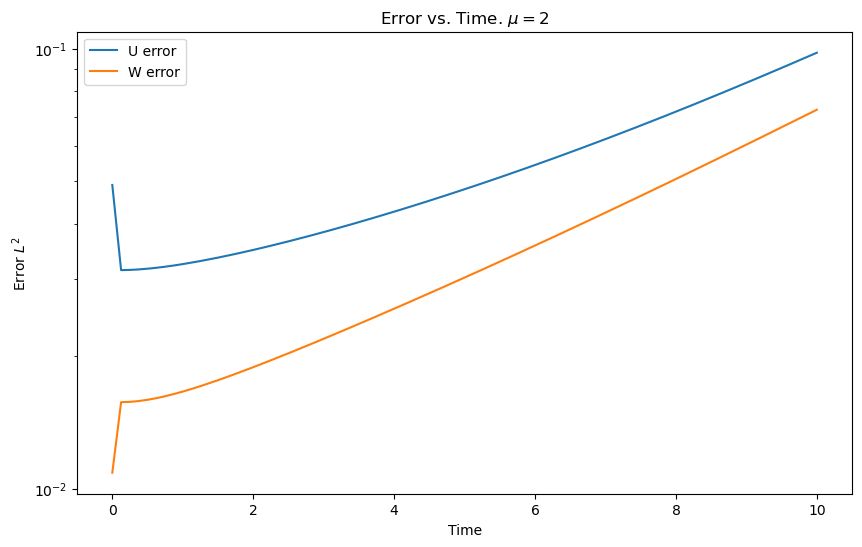

In [194]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U error')
plt.semilogy(time, w_error, label='W error')
plt.xlabel('Time')
plt.ylabel('Error $L^2$')
plt.title(r'Error vs. Time. $\mu=2$')
plt.legend()
# plt.grid(True)
plt.show()

In [68]:
import numpy as np

# Number of points to generate
num_points = 1100

# Define the range
low = -np.pi
high = np.pi

# Generate random float points
random_points = np.random.uniform(low, high, num_points)

print(random_points)


[ 1.11725425 -1.44508252  1.47776762 ... -1.3400986  -3.01930636
 -0.63320444]


(100, 2)


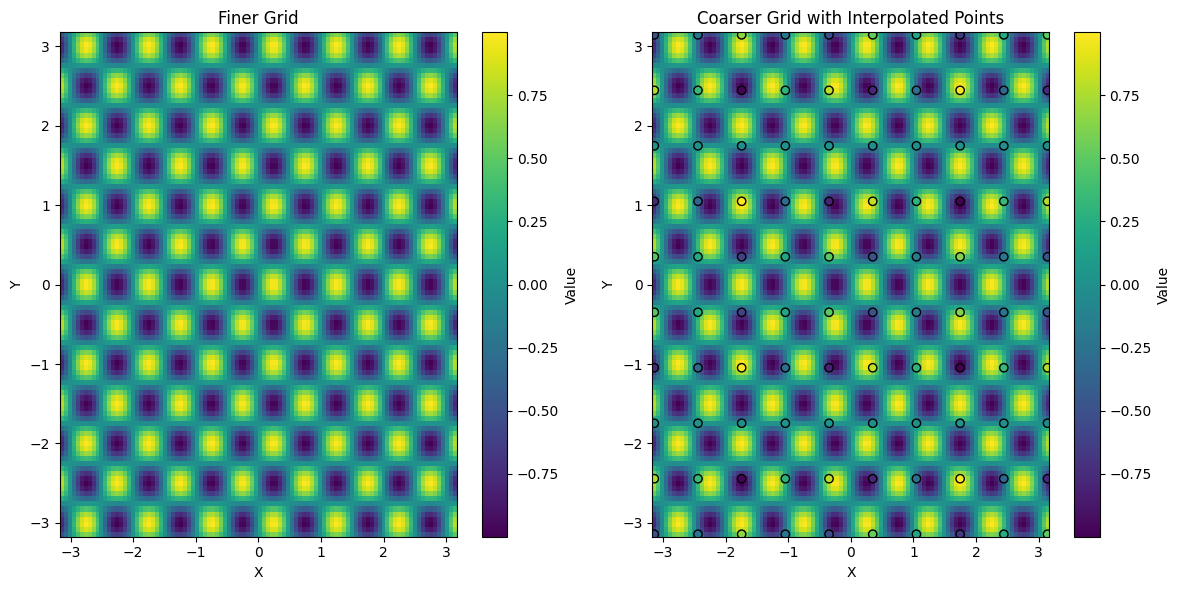

In [85]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Step 1: Create the finer grid and assign random values
x_fine = np.linspace(-np.pi, np.pi, 100)  # 100 points from -pi to pi
y_fine = np.linspace(-np.pi, np.pi, 100)  # 100 points from -pi to pi
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
Z_fine = np.sin(2 * np.pi * X_fine) * np.cos(2 * np.pi * Y_fine)

# Flatten the finer grid
points_fine = np.vstack([X_fine.flatten(), Y_fine.flatten()]).T
values_fine = Z_fine.flatten()

# Step 2: Define the coarser grid for query points
x_coarse = np.linspace(-np.pi, np.pi, 10)  # Fewer points, coarser grid
y_coarse = np.linspace(-np.pi, np.pi, 10)  # Fewer points, coarser grid
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
query_points = np.vstack([X_coarse.flatten(), Y_coarse.flatten()]).T
print(query_points.shape)
# Interpolate using griddata
interpolated_values = griddata(points_fine, values_fine, query_points, method='linear')

# Display results
# for i, (pt, val) in enumerate(zip(query_points, interpolated_values)):
#     print(f"Query point {i+1}: {pt}, Interpolated value: {val}")

# Optional: Visualize the grid and interpolation
plt.figure(figsize=(12, 6))

# Fine grid
plt.subplot(1, 2, 1)
plt.title('Finer Grid')
plt.pcolormesh(X_fine, Y_fine, Z_fine, shading='auto')
plt.colorbar(label='Value')
plt.xlabel('X')
plt.ylabel('Y')

# Coarse grid with interpolated values
plt.subplot(1, 2, 2)
plt.title('Coarser Grid with Interpolated Points')
plt.pcolormesh(X_fine, Y_fine, Z_fine, shading='auto')
plt.colorbar(label='Value')
plt.scatter(query_points[:, 0], query_points[:, 1], c=interpolated_values, cmap='viridis', edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


In [79]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Step 1: Define 50 query points and corresponding values
np.random.seed(0)  # For reproducibility
num_query_points = 50

# Random query points within the range [0, 1] x [0, 1]
# query_points = np.random.rand(num_query_points, 2)
query_grid_size = 20
grid_x = np.linspace(0, 1, query_grid_size)
grid_y = np.linspace(0, 1, query_grid_size)
query_X, query_Y = np.meshgrid(grid_x, grid_y)
query_points = np.vstack([query_X.ravel(), query_Y.ravel()]).T
# Random values for these query points (e.g., some function of the points)
true_values = np.sin(2 * np.pi * X) * np.cos(2 * np.pi * Y)
print()
values = griddata(grid_points, true_values, query_points)
values = np.sin(2 * np.pi * query_points[:, 0]) * np.cos(2 * np.pi * query_points[:, 1])

# Step 2: Create a 128x128 grid
grid_size = 128
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)
grid_points = np.vstack([X.ravel(), Y.ravel()]).T

# Step 3: Perform interpolation on the full grid using cubic interpolation
grid_values_cubic = griddata(query_points, values, grid_points, method='cubic')

# Reshape the interpolated values back to 128x128 grid
Z = grid_values_cubic.reshape(grid_size, grid_size)

# Step 4: Handle NaN values by interpolating with nearest method
# Find NaN locations in the grid
nan_mask = np.isnan(Z)

# Points corresponding to NaN locations
nan_points = np.vstack([X[nan_mask], Y[nan_mask]]).T

# Interpolate NaN points using nearest method
values_nearest = griddata(query_points, values, nan_points, method='nearest')

# Replace NaN values in Z with nearest neighbor interpolated values
Z[nan_mask] = values_nearest

# Step 5: Plot results (optional)
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.scatter(query_points[:, 0], query_points[:, 1], c=values, edgecolor='k', marker='o', s=50, label='Query Points')
plt.colorbar(label='Interpolated Value')
plt.title('Extrapolated Values on 128x128 Grid (with NaN handled)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


ValueError: different number of values and points

In [49]:
np.isnan(Z).any()

False